<a href="https://colab.research.google.com/github/shweta-aiml/100daysofcode/blob/master/HindiTextGeneratorUsingTokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
import os
import urllib.request
import zipfile
import glob


In [0]:
#downloading corpus from the github sites
def ensure_corpus():
    """ Makes sure that the corpus is on the hard-drive."""
    corpus_path = "corpus"
  # Do nothing if the filder already exists-
      # Download the whole git-repository as a zip.
    print("Downloading corpus...")
    corpus_url = "https://github.com/cltk/hindi_text_ltrc/archive/master.zip"
    corpus_zip_path = "master.zip"
    urllib.request.urlretrieve(corpus_url, corpus_zip_path)

    # Unzip the whole git-repository to the corpus-path.
    print("Unzipping corpus...")
    zip_file = zipfile.ZipFile(corpus_zip_path, 'r')
    zip_file.extractall(corpus_path)
    zip_file.close()

    # Remove the zip-file.
    os.remove(corpus_zip_path)
    return corpus_path

In [4]:
corpus_local_path = ensure_corpus()

Unzipping corpus...


In [5]:
tokenizer = Tokenizer()

""" Loads the data from the corpus. """

# Get paths to all files.
glob_path = os.path.join('/content/corpus', "**/*.txt")
paths = glob.glob(glob_path, recursive=True)

# Load all files to memory.
print("Loading all files...")
file_contents = []
for path in paths:
    data = open(path, "r").read()
    #if transliteration == True:
     #    file_content = sanscript.transliterate(file_content, sanscript.DEVANAGARI, sanscript.IAST)
    corpus = data.lower().split("\n")
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    # create input sequences using list of tokens
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
          n_gram_sequence = token_list[:i+1]
          input_sequences.append(n_gram_sequence)

Loading all files...


In [10]:
len(input_sequences)

7750

In [0]:
# # !wget --no-check-certificate \
# #     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
# #     -O /tmp/sonnets.txt
# data = open('/content/main.txt').read()

# corpus = data.lower().split("\n")


# tokenizer.fit_on_texts(corpus)
# total_words = len(tokenizer.word_index) + 1

# # create input sequences using list of tokens
# input_sequences = []
# for line in corpus:
# 	token_list = tokenizer.texts_to_sequences([line])[0]
# 	for i in range(1, len(token_list)):
# 		n_gram_sequence = token_list[:i+1]
# 		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
#model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 12, 100)           4766000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 12, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 47660)             4813660   
Total params: 10,041,260
Trainable params: 10,041,260
Non-trainable params: 0
_________________________________________________________________


In [11]:
 history = model.fit(predictors, label, epochs=60, verbose=1)

Epoch 1/60
243/243 [==============================] - 39s 161ms/step - loss: 4.0330 - accuracy: 0.1867
Epoch 2/60
243/243 [==============================] - 39s 161ms/step - loss: 3.9701 - accuracy: 0.1924
Epoch 3/60
243/243 [==============================] - 39s 160ms/step - loss: 3.9087 - accuracy: 0.1999
Epoch 4/60
243/243 [==============================] - 39s 160ms/step - loss: 3.8373 - accuracy: 0.2117
Epoch 5/60
243/243 [==============================] - 39s 160ms/step - loss: 3.7741 - accuracy: 0.2201
Epoch 6/60
243/243 [==============================] - 39s 161ms/step - loss: 3.7093 - accuracy: 0.2267
Epoch 7/60
243/243 [==============================] - 39s 160ms/step - loss: 3.6619 - accuracy: 0.2335
Epoch 8/60
243/243 [==============================] - 39s 159ms/step - loss: 3.5845 - accuracy: 0.2521
Epoch 9/60
243/243 [==============================] - 39s 160ms/step - loss: 3.5195 - accuracy: 0.2625
Epoch 10/60
243/243 [==============================] - 39s 161ms/step - l

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


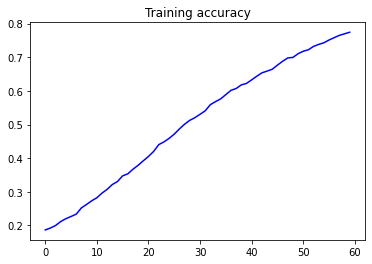

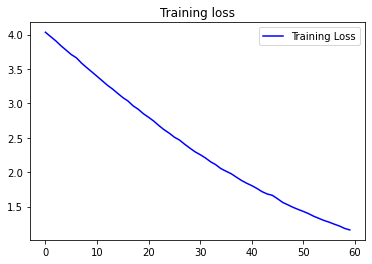

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [14]:
seed_text = "आप"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
आप न काहू आवई ससि में बलि कहिबे । । ।।75।। ।।6।। कहुँ पूजें ।।38।। फेटो॥ कौन सुत फेटो॥ है भेंटो॥ जगदीस। कौन फहरि फेटो॥ काम। है गहि छाँह रंगीले फेटो॥ ब्राह्मनी ससि । ओर बूझही तोड़ो संतापु। कुपी मेटो। उर फेटो॥ की॥ कौन की नाँधनि। है बा‍ढ़ि। रंगीले हर पास सकै मानत होय । हानि॥108॥ फेटो॥ रंगीले हूक॥274॥ फहरि फेटो॥ फेटो॥ होत की सोय। है भूप। कढ़त दिल रंगीले लागो सकै । नाहिं किया। मेटो। फेटो॥ पूजें ।।79।। पांडव भूप। समाय । कूप प्रीति। प्रीति मेटो। ओर लियो रंगीले भेषज लुभाय कहाँ सिया॥ ।।57।। होत की सोय। होय॥140॥ होत की
